# Python arrays : Numpy

**REF:** Scipy tutorial and A primer of Scientific Programming with Python. 

The numerical python package, `numpy`, allows for easy and efficient manipulation of vectorial data. In this context, it is important to remark some of the so-called `vectorial` computation. Let's give an example. Imagine a two dimensional vector $a$. How would you represent it using python? You coul use either a list, a tuple, etc:

    a1 = [x, y]
    a2 = (x, y)
    
Of course, it can be  generalized to more dimensions:

    a1 = [x, y, z, w]
    a2 = [0.0, -0.9, 1, -3, 9, ... , 90]
   
Managing vectors by using these typical python constructs is very good from a general programmer point of view, but it has its costs. For example, iterating over a lits by means of a for loop could be very slow. Actually, for typical problemas of computational mathematics and physics, only homogeneous storage structs with fast access are needed, like the arrays of languages like c++, fortran, etc. Arrays might be more limited than general lists, but could vastly outperform lists and tuples for vectorial computations. The `numpy` package provides array like structs to perform fast mathematical operations on numerical data.

Furthermore, vectorial operations are natural on numpy arrays. But what is a vectorial operation? Let's assume we have a vector $v$ of $n$-components. What would be the meaning of something like
    u = sin(v)
? in the context of vectorial computing, it would mean to apply the function `sin` to every component of the vector `v`, therefore $u_i = \sin(v_i)$. In general, given a function $f$, the expression $u = f(v)$ means $u_i = f(v_i)$. Numpy allows for this kind of computing. What would be the meaning of 
    u = v^2*cos(v)*e^v + 2
?

## Basic numpy
Try the following code snippet:

In [2]:
import numpy as np
a = np.array([0, 1.0, '3', 5])
print a
a.dtype

['0' '1.0' '3' '5']


dtype('S32')

This means: we are importing the numpy package with the name np. Then, we create an numpy array by using the `np.array` function from a list of values, and assign the result to the variable `a`. What is `a`? use `a?` . The array `a` has several attributes which you can use later, like the shape and type of the internal data. 

Let's now compare the efficiency of a list versus a numpy array, by means of the %timeit magic function of ipython:

In [ ]:
L = range(10000)
%timeit [i**2 for i in L]

In [ ]:
a = np.arange(10000)
%timeit a**2

You can extract some info like the shape and the dimension as 

In [ ]:
a.ndim

In [ ]:
a.shape

In [ ]:
a.dtype

### Alternative ways to create arrays

    a = np.arange(10)
    b = np.arange(1, 9, 2)
    
The function `linspace` is very useful. It allows to create a uniform partition on a given interval for a given number of points. For example, to create an array of 100 points uniformly on the interval [2, 3], you can use  

In [ ]:
a = np.linspace(2, 3, 100)
print a

Check the documentation.

You can also create several other types of useful arrays like

In [ ]:
a = np.ones((3, 4)) # shape is a tuple
print a

In [5]:
a = np.random.rand(4)
print a

[ 0.900158    0.23643884  0.70674432  0.53132537]


## Indexing and slicing

Numpy allows for powerfull and efficient access to internal members of arrays

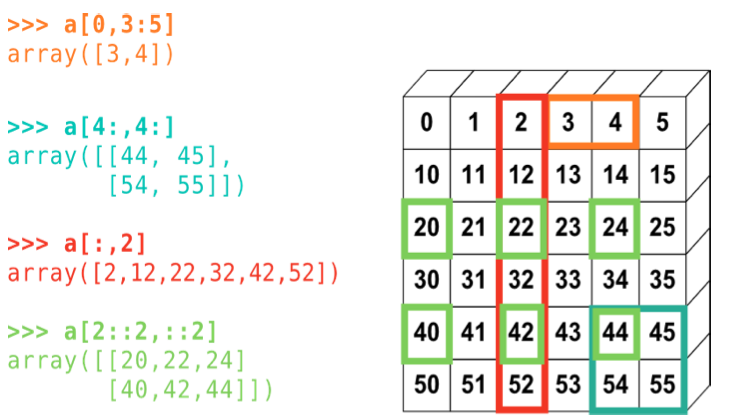

In [39]:
from IPython.core.display import Image 
Image(filename='slicing.png')

## Copies and Views 

A slicing operation creates a __view__ of the original array, not a copy (in contrast, an slice of a list creates a new list). A modification of a view, modifies the original array:

In [42]:
a = np.arange(10)
print a
b = a[::2]
print b
b[0] = 12
print b
print a

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[12  2  4  6  8]
[12  1  2  3  4  5  6  7  8  9]


But, if you really need a copy, you can use the `.copy` method:

a = np.arange(10)
print a
c = a[::2].copy()
c[0] = 12
print a
print c

### Indexing with integers

In [6]:
a = np.arange(0, 100, 10)
print a
a[[2, 3, 2, 4, 2]]

[ 0 10 20 30 40 50 60 70 80 90]


array([20, 30, 20, 40, 20])

In [7]:
a[[9, 7]] = -100
print a

[   0   10   20   30   40   50   60 -100   80 -100]


## Numerical operations (or vector computing)

As stated at the beginning, numpy arrays are well suited for the so called numerical computing. In this section we will see some examples to get familiar with this kind of operations. 

In [43]:
a = np.array([1, 2, 3, 4])
print a 
print a + 1
print 2*a

[1 2 3 4]
[2 3 4 5]
[2 4 6 8]


In [44]:
b = np.ones(4) + 1
print b
b-a

[ 2.  2.  2.  2.]


array([ 1.,  0., -1., -2.])

In [ ]:
j = np.arange(5)
2**(j + 1) - j

Performance comparison:

In [8]:
a = np.arange(10000)
%timeit a + 1

10000 loops, best of 3: 20.2 µs per loop


In [9]:
l = range(10000)
%timeit [i+1 for i in l]

1000 loops, best of 3: 882 µs per loop


Take into account that array multiplication should be done through function `np.dot`